In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
import dataframe_image as dfi

from matplotlib import font_manager, rc

#사용하려는 OTF 폰트의 경로를 지정합니다.
font_path = r'C:\Users\User\AppData\Local\Microsoft\Windows\Fonts\NotoSansKR-Regular.otf'

#폰트 이름을 가져옵니다.
font_name = font_manager.FontProperties(fname=font_path).get_name()

#폰트를 설정합니다.
rc('font', family=font_name)

# 2014년에서 2023년 다문화가정 학생 현황
데이터셋 파일 출처: https://data.seoul.go.kr/dataList/10714/S/2/datasetView.do

In [3]:
culture_file_path = '..\Excel\culture_elementary_scool_2014to2023.xlsx'
df = pd.read_excel(culture_file_path, engine='openpyxl', header=1)  #인덱스 1을 hedear로 설정

df.head()

,학력별(1),시점,소계,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
0,학력별(1),시점,계,계,계,계,계,계,계,계,...,계,계,계,계,계,계,계,계,계,계
1,초등학교,2014,6987,120,172,318,283,245,278,285,...,351,607,386,626,224,361,103,147,269,291
2,초등학교,2015,8514,133,205,309,325,267,319,354,...,463,853,476,808,276,465,107,181,297,311
3,초등학교,2016,10226,181,248,381,374,309,363,412,...,584,1042,586,1002,326,550,121,236,371,340
4,초등학교,2017,11033,149,281,388,392,377,385,463,...,565,1181,698,1139,384,634,140,221,387,336


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   학력별(1)  11 non-null     object
 1   시점      11 non-null     object
 2   소계      11 non-null     object
 3   종로구     11 non-null     object
 4   중구      11 non-null     object
 5   용산구     11 non-null     object
 6   성동구     11 non-null     object
 7   광진구     11 non-null     object
 8   동대문구    11 non-null     object
 9   중랑구     11 non-null     object
 10  성북구     11 non-null     object
 11  강북구     11 non-null     object
 12  도봉구     11 non-null     object
 13  노원구     11 non-null     object
 14  은평구     11 non-null     object
 15  서대문구    11 non-null     object
 16  마포구     11 non-null     object
 17  양천구     11 non-null     object
 18  강서구     11 non-null     object
 19  구로구     11 non-null     object
 20  금천구     11 non-null     object
 21  영등포구    11 non-null     object
 22  동작구     11 non-null     obje

In [5]:
df.head()

,학력별(1),시점,소계,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
0,학력별(1),시점,계,계,계,계,계,계,계,계,...,계,계,계,계,계,계,계,계,계,계
1,초등학교,2014,6987,120,172,318,283,245,278,285,...,351,607,386,626,224,361,103,147,269,291
2,초등학교,2015,8514,133,205,309,325,267,319,354,...,463,853,476,808,276,465,107,181,297,311
3,초등학교,2016,10226,181,248,381,374,309,363,412,...,584,1042,586,1002,326,550,121,236,371,340
4,초등학교,2017,11033,149,281,388,392,377,385,463,...,565,1181,698,1139,384,634,140,221,387,336


In [6]:
df_culture = df.iloc[1:, [1, 2]].astype('int64')    #'시점'과 '소계'열만 선택해 데이터 타입 `int64`로 변경
df_culture.set_index('시점', inplace=True)  #인덱스 '시점'으로 설정과 동시 반영

df_culture.columns = ['다문화 학생 수'] #컬럼명 '소계' → '다문화 학생 수'

df_culture.head()

,다문화 학생 수
시점,
2014,6987
2015,8514
2016,10226
2017,11033
2018,11940


# 2014년에서 2023년 초등학교 총괄
데이터셋 파일 출처: https://stat.eseoul.go.kr/statHtml/statHtml.do?orgId=201&tblId=DT_201004_O130001&conn_path=I2

In [7]:
school_file_path = 'C:\데이터 분석 포토폴리오\Seoul_Education_Data_Competition_2024\Excel\elementary_school_2014to2023.xlsx'
df_school = pd.read_excel(school_file_path, engine='openpyxl', header=0)

df_school.head()

,시도별(1),설립주체별(1),시점,학급수 (개),학생수 (명),입학자수 (명),졸업자수 (명)
0,서울특별시,계,2014,18854,457517,79656,88172
1,서울특별시,계,2015,18780,450675,75258,78066
2,서울특별시,계,2016,18621,436121,69944,79123
3,서울특별시,계,2017,18625,428333,72529,75440
4,서울특별시,계,2018,18585,424800,70686,67742


In [8]:
df_school = df_school.iloc[:, 2:]
df_school.set_index("시점", inplace=True)

df_school.columns =['학급 수', '전체 학생 수', '입학생 수', '졸업생 수']

df_school.head()

,학급 수,전체 학생 수,입학생 수,졸업생 수
시점,,,,
2014,18854,457517,79656,88172
2015,18780,450675,75258,78066
2016,18621,436121,69944,79123
2017,18625,428333,72529,75440
2018,18585,424800,70686,67742


In [9]:
#새로운 데이터프레임 df_student 생성
df_student = pd.concat([df_school['전체 학생 수'], df_culture], axis=1) #데이터프레임 df_school['전체 학생 수']와 df_culture 열을 기준으로(axis=1) 합치기
df_student['순수 한국인 학생 수'] = df_school['전체 학생 수'] - df_culture['다문화 학생 수']    #'순수 한국인 학생 수' 구하는 계산식

#셋째 자리에서 반올림
df_student['다문화 학생 비율'] = round((df_student['다문화 학생 수'] / df_student['전체 학생 수']) * 100, 2)    
df_student['순수 한국인 학생 비율'] = round((df_student['순수 한국인 학생 수'] / df_student['전체 학생 수']) * 100, 2)

df_student.head()

,전체 학생 수,다문화 학생 수,순수 한국인 학생 수,다문화 학생 비율,순수 한국인 학생 비율
시점,,,,,
2014,457517,6987,450530,1.53,98.47
2015,450675,8514,442161,1.89,98.11
2016,436121,10226,425895,2.34,97.66
2017,428333,11033,417300,2.58,97.42
2018,424800,11940,412860,2.81,97.19


In [10]:
#'순수 한국인' 데이터프레임
df_korea = df_student.iloc[:, [0, 2]]

df_korea.head()

,전체 학생 수,순수 한국인 학생 수
시점,,
2014,457517,450530
2015,450675,442161
2016,436121,425895
2017,428333,417300
2018,424800,412860


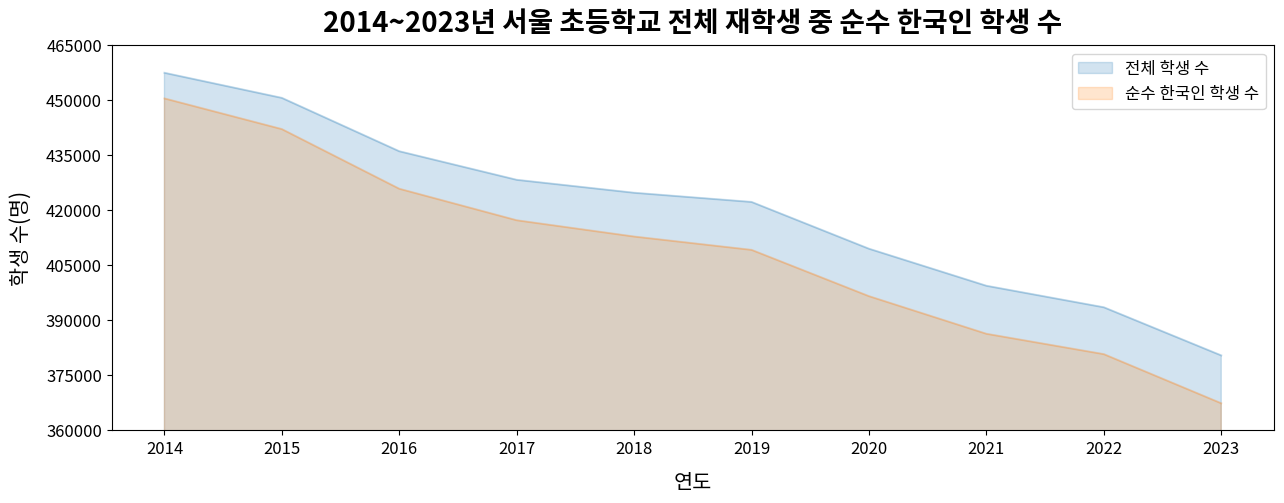

In [11]:
#면적 그래프
df_korea.plot(kind='area', stacked=False, alpha=0.2, figsize=(15,5))

plt.title("2014~2023년 서울 초등학교 전체 재학생 중 순수 한국인 학생 수", weight='bold', fontsize=20, pad=10)

plt.xlabel('연도', fontsize=15, labelpad=10)
plt.xticks(df_korea.index.to_list(), fontsize=12)
plt.ylabel('학생 수(명)', fontsize=15, labelpad=10)
plt.yticks(np.arange(360000, 465001, 15000), fontsize=12)   #y축 범위 설정
plt.ylim(360000, 465000)

plt.legend(loc='best', fontsize=12)

plt.show()

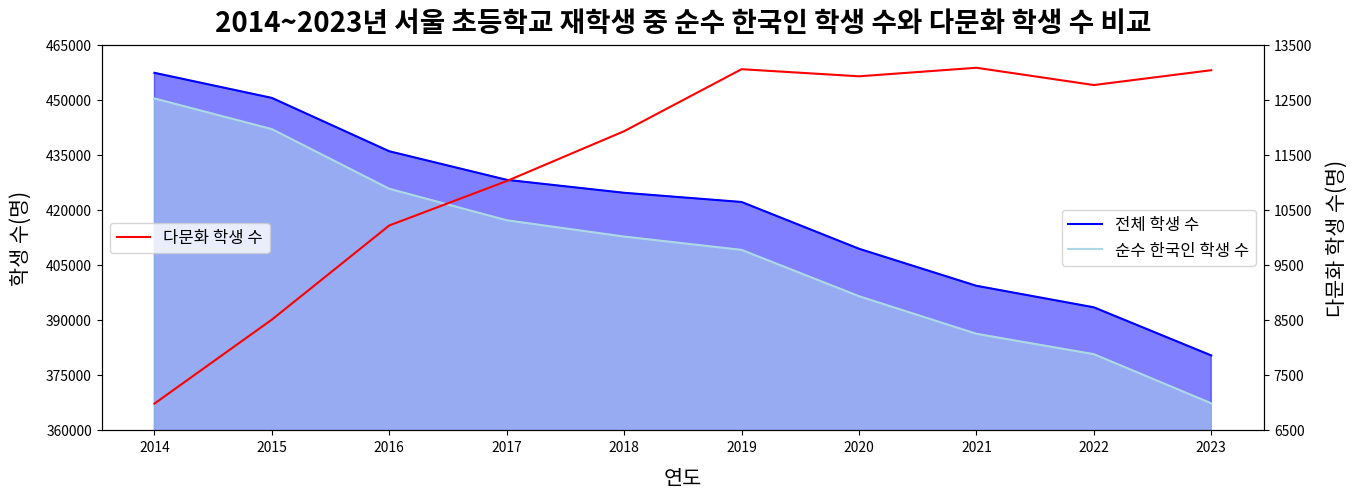

In [12]:
#이중 y축 그래프
fig, ax1 = plt.subplots(figsize=(15,5))
x = df_korea.index.to_list()

#첫 번째 y축 선 그래프
ax1.plot(x, df_korea['전체 학생 수'], color='blue', label='전체 학생 수')
ax1.plot(x, df_korea['순수 한국인 학생 수'], color='lightblue', label='순수 한국인 학생 수')

#누적 그래프
ax1.fill_between(x, df_korea['전체 학생 수'], color='blue', alpha=0.5)
ax1.fill_between(x, df_korea['순수 한국인 학생 수'], color='lightblue', alpha=0.5)

ax1.set_xlabel('연도', fontsize=15, labelpad=10)
ax1.set_xticks(x)   #[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
ax1.set_ylabel('학생 수(명)', fontsize=15, labelpad=10)
ax1.set_ylim(360000, 465000)
ax1.set_yticks(np.arange(360000, 465001, 15000))

ax1.legend(loc='center right', fontsize=12)

# 두 번째 y축에 꺾은선 그래프
ax2 = ax1.twinx()
ax2.plot(x, df_culture, color='red', label='다문화 학생 수')
ax2.set_ylabel('다문화 학생 수(명)', fontsize=15, labelpad=10)
ax2.set_ylim(6500, 13500)
ax2.set_yticks(np.arange(6500, 13501, 1000))

ax2.legend(loc='center left', fontsize=12)

#전체 타이틀
plt.title('2014~2023년 서울 초등학교 재학생 중 순수 한국인 학생 수와 다문화 학생 수 비교', fontsize=20, pad=10, weight='bold')

plt.show()

### 주요 분석 내용

**1. 전체 학생 수 감소**<br>
그래프에서 파란색 영역으로 표현된 '전체 학생 수'는 2014년 이후 지속적으로 감소하고 있다. 서울의 학령인구가 줄어들고 있는 추세를 반영하고 있으며, 출산율 감소나 인구 구조 변화와 관련이 있을 수 있다.<br>

**2. 다문화 학생 수 증가**<br>
'다문화 학생 수(빨간색 선)'는 2014년부터 꾸준히 증가하다가 2019년 이후부터는 완만한 상승세를 보이고 있다. 서울 내 다문화 가정이 점점 더 늘어나고 있음을 보여준다.<br>

**3. 순수 한국인 학생 수 감소**<br>
'순수 한국인 학생 수(하늘색 선)'는 전체 학생 수와 마찬가지로 감소하고 있다. 이 역시 학령인구 감소와 관련이 있을 가능성이 크다.

**4. 2019년을 기점으로 비율 변화**<br>
2019년을 기점으로 전체 학생 수 대비 다문화 학생 수 비중이 점점 더 커지고 있다. 이는 전체적으로 학생 수가 감소하고 있지만, 다문화 학생의 증가로 인해 서울의 초등학교 내에서 다문화 학생의 비중이 눈에 띄게 높아지고 있음을 시사한다.<br>

### 결론
서울의 초등학교는 학생 수가 전반적으로 감소하고 있지만, 다문화 학생 수는 계속해서 증가하고 있다. 다문화 가정 학생 비율이 높아지에 따라, 이들을 위한 교육적 지원과 정책이 더욱 중요한 과제가 될 것이다.

In [13]:
df_region = df.copy().drop(df.columns[[0, 2]], axis=1).iloc[1:, :]  #column index 0,2 drop하고 행은 1부터

df_region.set_index('시점', inplace=True)

df_region = df_region.astype('int64')

df_region.info()
df_region.head()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 2014 to 2023
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   종로구     10 non-null     int64
 1   중구      10 non-null     int64
 2   용산구     10 non-null     int64
 3   성동구     10 non-null     int64
 4   광진구     10 non-null     int64
 5   동대문구    10 non-null     int64
 6   중랑구     10 non-null     int64
 7   성북구     10 non-null     int64
 8   강북구     10 non-null     int64
 9   도봉구     10 non-null     int64
 10  노원구     10 non-null     int64
 11  은평구     10 non-null     int64
 12  서대문구    10 non-null     int64
 13  마포구     10 non-null     int64
 14  양천구     10 non-null     int64
 15  강서구     10 non-null     int64
 16  구로구     10 non-null     int64
 17  금천구     10 non-null     int64
 18  영등포구    10 non-null     int64
 19  동작구     10 non-null     int64
 20  관악구     10 non-null     int64
 21  서초구     10 non-null     int64
 22  강남구     10 non-null     int64
 23  송파구     10 non-nu

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
시점,,,,,,,,,,,,,,,,,,,,,
2014,120,172,318,283,245,278,285,287,181,186,...,351,607,386,626,224,361,103,147,269,291
2015,133,205,309,325,267,319,354,354,230,235,...,463,853,476,808,276,465,107,181,297,311
2016,181,248,381,374,309,363,412,397,298,297,...,584,1042,586,1002,326,550,121,236,371,340
2017,149,281,388,392,377,385,463,430,282,324,...,565,1181,698,1139,384,634,140,221,387,336
2018,161,265,396,417,381,438,554,456,335,389,...,607,1295,813,1184,424,669,165,202,417,387


In [32]:
#기준: 행(시점)의 열
max_row = df_region.max(axis=1) #최댓값
max_row_region = df_region.idxmax(axis=1)   #최댓값 자치구
min_row = df_region.min(axis=1) #최솟값
min_row_region = df_region.idxmin(axis=1)   #최솟값 자치구

#데이터프레임 생성
df_row = pd.DataFrame({
    '최댓값': max_row,
    '최댓값_자치구': max_row_region,
    '최솟값': min_row,
    '최솟값_자치구': min_row_region
})

#기준: 열(자치구)의 행
max_column = df_region.max()    #최댓값
max_column_idx = df_region.idxmax() #최댓값 시점
min_column = df_region.min()    #최솟값
min_column_idx = df_region.idxmin() #최솟값 시점

#데이터프레임 생성
df_column = pd.DataFrame({
    '최댓값': max_column,
    '최댓값_시점': max_column_idx,
    '최솟값': min_column,
    '최솟값_시점': min_column_idx
}).sort_index(ascending=True)

In [41]:
print(df_row)
print(df_region[['구로구']])

       최댓값 최댓값_자치구  최솟값 최솟값_자치구
시점                             
2014   626    영등포구  103     서초구
2015   853     구로구  107     서초구
2016  1042     구로구  121     서초구
2017  1181     구로구  140     서초구
2018  1295     구로구  161     종로구
2019  1463     구로구  166     서초구
2020  1448     구로구  162     종로구
2021  1477     구로구  157     종로구
2022  1440     구로구  163     종로구
2023  1535     구로구  162     종로구
       구로구
시점        
2014   607
2015   853
2016  1042
2017  1181
2018  1295
2019  1463
2020  1448
2021  1477
2022  1440
2023  1535


: 

### 주요 분석 내용

**1. 구로구의 다문화 학생 수 급증**<br>
구로구의 다문화 학생 수는 2014년 697명에서 2023년 1535명으로 급격히 증가했으며, 이 시기 동안 매년 서울에서 다문화 학생 수가 가장 많은 자치구로 기록되었다. <br>

**2. 다문화 학생 수의 집중 현상**<br>
구로구는 매년 다문화 학생 수가 최고치를 기록하고 있는 반면, 서초구와 종로구는 최솟값을 기록하고 있어 다문화 학생의 지역적 집중 현상이 두드러진다. <br>

**3. 구로구의 특이성**<br>
구로구는 서울 내에서 다문화 가정이 지속적으로 유입되거나 성장하고 있는 지역으로, 다문화 학생 수가 계속 증가하고 있는 추세이다. 이는 구로구의 사회적·교육적 자원 배분에 큰 영향을 미칠 수 있다. <br>

따라서 구로구는 다문화 학생들을 위한 교육 지원이 집중적으로 필요하며, 이 지역 내 학교와 커뮤니티는 다문화 학생 비율의 증가에 대비할 필요가 있다.

In [34]:
df_column

,최댓값,최댓값_시점,최솟값,최솟값_시점
강남구,236,2016,147,2014
강동구,526,2023,291,2014
강북구,408,2021,181,2014
강서구,712,2020,351,2014
관악구,766,2019,361,2014
광진구,542,2023,245,2014
구로구,1535,2023,607,2014
금천구,972,2021,386,2014
노원구,456,2019,276,2014
도봉구,425,2023,186,2014


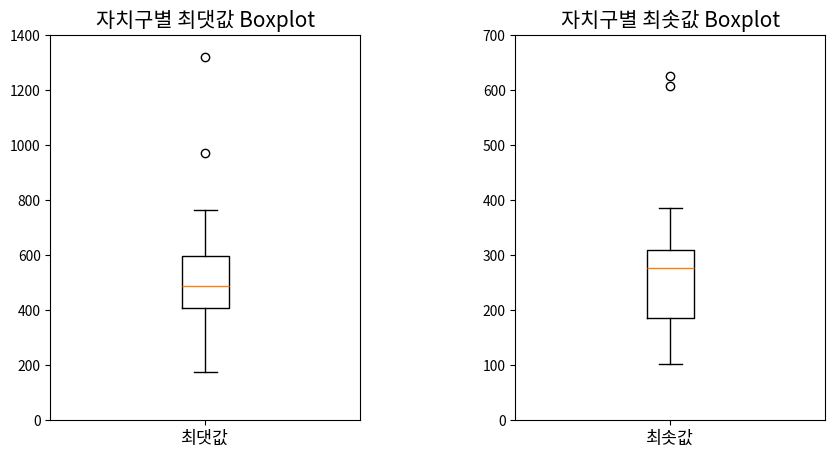

In [35]:
# 박스플롯 그리기
fig, axes = plt.subplots(1, 2, figsize=(10,5))

# 최댓값 박스플롯
axes[0].boxplot(df_column['최댓값'])
axes[0].set_title('자치구별 최댓값 Boxplot', fontsize=15)
axes[0].set_xticklabels(['최댓값'], fontsize=12.5)
axes[0].set_ylim(0, 1400)

# 최솟값 박스플롯
axes[1].boxplot(df_column['최솟값'])
axes[1].set_title('자치구별 최솟값 Boxplot', fontsize=15)
axes[1].set_xticklabels(['최솟값'], fontsize=12.5)
axes[1].set_ylim(0, 700)

# 서브플롯 사이 간격 조정
plt.subplots_adjust(wspace=0.5)  # 간격을 적절히 조정

plt.show()

### 주요 분석 내용
※ IQR(Interquartile Range, 사분위수 범위), 이상치(Outliers)<br>

**1. 최댓값 박스플롯**<br>
**중앙값**: 최댓값 박스플롯의 중앙값은 약 600 근처에 위치하고 있으며, 이는 자치구별로 상당수의 데이터가 이 값을 중심으로 분포하고 있음을 나타낸다.<br>
**IQR**: 박스의 크기를 보면 대략 400에서 800 사이에 해당하는 자치구들이 다수를 차지하고 있다. 이 구간이 최댓값 분포의 주류를 형성한다.<br>
**이상치**: 1000을 초과하는 데이터 포인트들이 이상치로 나타나고 있다. 예를 들어, 1200과 1300 이상의 값이 이상치로 표시되는데, 특정 자치구(구로구 등)의 최댓값이 다른 구에 비해 매우 높다는 것을 의미한다. 구로구와 같이 최댓값이 큰 자치구에서 발생한 것이다.<br>

**2. 최솟값 박스플롯**<br>
**중앙값**: 최솟값 박스플롯의 중앙값은 약 250~300 사이로, 자치구별 최솟값은 이 범위에서 주로 분포하고 있다.<br>
**IQR**: 박스의 크기를 보면 약 200에서 350 사이에 걸쳐 대부분의 자치구에 분포하고 있음을 알 수 있다. 즉, 자치구별 최솟값이 대체로 범위 내에서 안정적으로 유지되고 있다.<br>
**이상치**: 600을 넘는 데이터 포인트가 이상치로 표시되어 있다. 특정 자치구(구로구 등)의 최솟값이 다른 자치구들에 비해 매우 높음을 의미힌다.<br>

### 인사이트
**1. 구로구와 영등포구의 특이점**<br>
최댓값 박스플롯에서 확인할 수 있듯이 구로구와 영등포구는 최댓값에서 특히 높은 값을 기록하고 있으며, 다른 자치구들과 비교했을 때 확연이 두드러진다. 이러한 값들은 자치구의 특성상 경제적 혹은 인구적인 요인이 반영된 결과일 수 있다. <br>

**2. 최댓값과 최솟값 분포 차이**<br>
최댓값 박스플롯에서는 1000을 넘는 이상치가 다수 존재하는 반면, 최솟값 박스플롯에서는 600을 넘는 소수의 이상치만 관찰된다. 자치구별로 최댓값의 편차가 최솟값의 편차보다 크다는 것을 알 수 있다. <br>

**3. 전반적인 안정성** <br>
최솟값 박스플롯을 보면 대부분의 자치구는 200~350 사이에서 안정적으로 최솟값을 유지하고 다. 이는 데이터에서 일부 극단적인 값을 제외하면 전체적인 변동 폭이 크지 않다는 점을 시사한다.